In [5]:
#Imports
import pandas as pd
import numpy as np

In [6]:
#Read and print data
troop_movements_df = pd.read_csv('../troop_movements.csv')
print(troop_movements_df.head())

             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-05-21 01:06:09        1        x-wing               empire   
1  2024-05-21 01:06:08        2        x-wing               empire   
2  2024-05-21 01:06:07        3         at-at           resistance   
3  2024-05-21 01:06:06        4        x-wing               empire   
4  2024-05-21 01:06:05        5  tie_silencer               empire   

   location_x  location_y  destination_x  destination_y homeworld  
0           9           5              8              3  Iridonia  
1           6           3              4              9   Tholoth  
2          10           8              4              5  Dathomir  
3           4           4              8              7   Vulpter  
4           4           5              4              2   Dagobah  


In [7]:
# Create grouped data showing counts of empire vs resistance.
empire_vs_resistance = troop_movements_df['empire_or_resistance'].value_counts().reset_index()
empire_vs_resistance.columns = ['empire_or_resistance', 'count']
print(empire_vs_resistance)

  empire_or_resistance  count
0               empire    515
1           resistance    485


In [8]:
# Create grouped data showing counts of characters by homeworld
homeworld_counts = troop_movements_df['homeworld'].value_counts().reset_index()
homeworld_counts.columns = ['homeworld', 'count']
print(homeworld_counts)

       homeworld  count
0       Iridonia     40
1    Glee Anselm     38
2       Alderaan     32
3       Corellia     31
4        Stewjon     30
5    Aleen Minor     30
6       Toydaria     30
7        Serenno     27
8        Vulpter     27
9        Troiken     27
10         Zolan     27
11    Haruun Kal     27
12       Tholoth     27
13     Trandosha     27
14       Iktotch     26
15          Ojom     25
16        Eriadu     25
17         Skako     25
18      Mon Cala     25
19      Tatooine     23
20         Naboo     23
21        Ryloth     22
22       Quermia     22
23    Bestine IV     22
24       Socorro     21
25          Tund     21
26        Mirial     21
27    Muunilinst     21
28         Dorin     21
29       Dagobah     20
30     Chandrila     20
31         Cerea     20
32         Kalee     20
33        Umbara     20
34      Dathomir     19
35       Sullust     18
36      Kashyyyk     18
37         Shili     18
38     Malastare     17
39  Concord Dawn     17
40      Champala

In [9]:
# Created grouped data showing counts of characters by unit_type.
unit_type_counts = troop_movements_df['unit_type'].value_counts().reset_index()
unit_type_counts.columns = ['unit_type', 'count']
print(unit_type_counts)

            unit_type  count
0             unknown    142
1         tie_fighter    141
2              x-wing    134
3        stormtrooper    133
4               at-st    132
5  resistance_soldier    118
6        tie_silencer    108
7               at-at     92


In [10]:
# Engineer a new feature called is_resistance with a True or False value based on empire_or_resiatance.
troop_movements_df['is_resistance'] = troop_movements_df['empire_or_resistance'] == 'resistance'
print(troop_movements_df.head())

             timestamp  unit_id     unit_type empire_or_resistance  \
0  2024-05-21 01:06:09        1        x-wing               empire   
1  2024-05-21 01:06:08        2        x-wing               empire   
2  2024-05-21 01:06:07        3         at-at           resistance   
3  2024-05-21 01:06:06        4        x-wing               empire   
4  2024-05-21 01:06:05        5  tie_silencer               empire   

   location_x  location_y  destination_x  destination_y homeworld  \
0           9           5              8              3  Iridonia   
1           6           3              4              9   Tholoth   
2          10           8              4              5  Dathomir   
3           4           4              8              7   Vulpter   
4           4           5              4              2   Dagobah   

   is_resistance  
0          False  
1          False  
2           True  
3          False  
4          False  


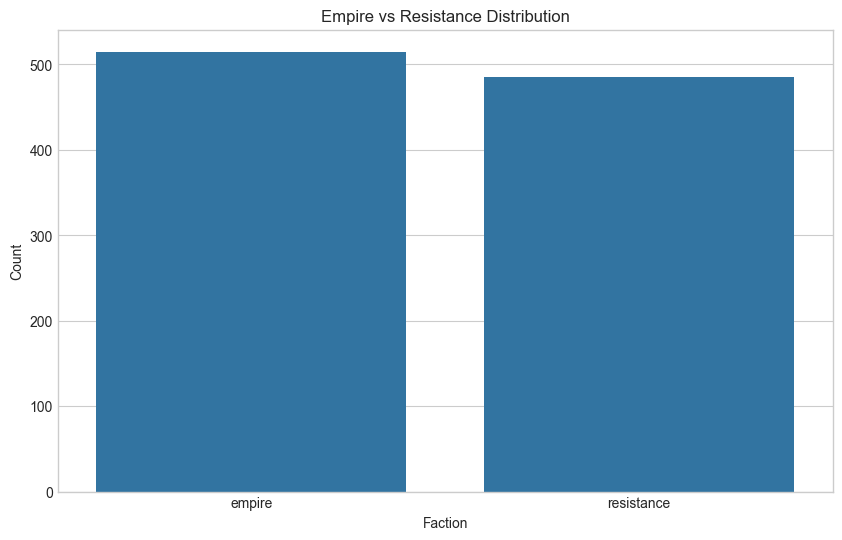

In [11]:
# Create a bar plot using Seaborn showing Empire vs Resistance distribution.
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='empire_or_resistance', y='count', data=empire_vs_resistance)
plt.title('Empire vs Resistance Distribution')
plt.xlabel('Faction')
plt.ylabel('Count')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = troop_movements_df[['unit_type', 'homeworld']]
X_encoded = pd.get_dummies(X, columns=['unit_type', 'homeworld'])
y = troop_movements_df['empire_or_resistance']

# Create training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeClassifier and fit the data
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)

# Calculate accurace score
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy: " + str(accuracy))

Model Accuracy: 0.5


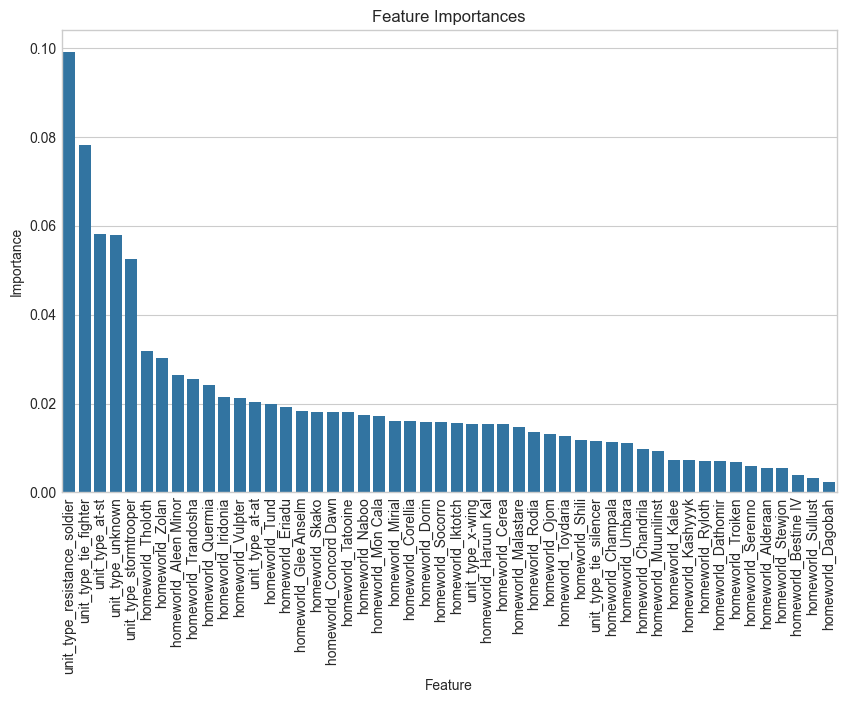

In [16]:
# Get feature importances
importances = decision_tree.feature_importances_

# Create a DataFrame to hold the feature importances
feature_importances = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})

plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Importance', data=feature_importances.sort_values(by="Importance", ascending=False))
plt.title('Feature Importances')
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

In [17]:
#Save to pickle
import pickle

# Specify the file path to save the pipeline
file_path = 'trained_model.pkl'

# Save the pipeline to disk
with open(file_path, 'wb') as file:
    pickle.dump(decision_tree, file)